In [294]:
# Install scikit-learn if not already installed
#Import libraries
import pandas as pd #For data manipulation and analysis
import os #For file and directory manipulation
import numpy as np #For numerical operations
import matplotlib.pyplot as plt #For data visualization
import seaborn as sns #For statistical data visualization
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder #For data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

Data Preprocessing

In [295]:
# Load data
filepath = 'train.csv'  # Replace with your actual path
df_Train = pd.read_csv(filepath, sep=';')
# Display info and head
df_Train.info()

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [ ]:

display(df_Train.head(10))

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
# Drop duplicates
before = df_Train.shape[0]
df_Train = df_Train.drop_duplicates()
after = df_Train.shape[0]
print(f"Duplicates dropped: {before - after}")
print(f"New shape: {df_Train.shape}")


Duplicates dropped: 0
New shape: (614, 13)


In [ ]:
# Check missing values
print(df_Train.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [ ]:

# Impute missing values (here: drop rows with any missing values)
df_Train = df_Train.dropna()
print(df_Train.isnull().sum())
print(f"Dataset shape after dropping missing values: {df_Train.shape}")

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Dataset shape after dropping missing values: (480, 13)


In [ ]:
# Encode categorical variables
# Encode categorical variables
label_cols = df_Train.select_dtypes(include=['object']).columns.tolist()
le = LabelEncoder()
for col in label_cols:
    df_Train[col] = le.fit_transform(df_Train[col].astype(str))



Modelling | XGboost

In [ ]:
# Define features and target
X = df_Train.drop(columns=['Loan_ID', 'Loan_Status', 'Property_Area', 'Education', 'Married','Gender' ], axis=1)
y = df_Train['Loan_Status']

# First split: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# Second split: 15% validation, 15% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)


In [ ]:
# Initialize and train XGBoost model
xgb_model = XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    max_depth=5,
    learning_rate=0.8,
    subsample=0.5,
    colsample_bytree=0.9,
    random_state=42
)

# Best Hyperparameters:
#  Max_depth: 5
#  Learning_rate: 0.0798
#  Subsample: 0.6273
#  Colsample_bytree: 0.9484
# Validation Accuracy: 0.8194

xgb_model.fit(X_train, y_train)


# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7916666666666666

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.68      0.67        22
           1       0.86      0.84      0.85        50

    accuracy                           0.79        72
   macro avg       0.75      0.76      0.76        72
weighted avg       0.79      0.79      0.79        72


Confusion Matrix:
[[15  7]
 [ 8 42]]


4 - Vector Optimization 

In [ ]:
import random
# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)

# ...existing code...
from xgboost import XGBClassifier

# If using XGBoost >= 1.7, you can also set the global random seed for XGBoost:
# import xgboost as xgb
# xgb.set_config(verbosity=0, random_state=42)


def decode_vector(vector):
    max_depth = int(3 + vector[0] * 7)
    learning_rate = 0.01 + vector[1] * 0.29
    subsample = 0.35 + vector[2] * 0.5
    colsample_bytree = 0.5 + vector[3] * 0.5
    return max_depth, learning_rate, subsample, colsample_bytree

def evaluate_fitness(vector):
    max_depth, learning_rate, subsample, colsample_bytree = decode_vector(vector)
    model = XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        n_estimators=30,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        tree_method='hist',
        random_state=42,
        verbosity=0
    )
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    return accuracy_score(y_val, preds)

def four_vector_optimization(pop_size=5, iterations=5, alpha=0.1):
    population = np.random.rand(pop_size, 4)
    fitness = np.array([evaluate_fitness(ind) for ind in population])
    best_idx = np.argmax(fitness)
    best_vector = population[best_idx].copy()
    
    for _ in range(iterations):
        for i in range(pop_size):
            new_vector = population[i] + alpha * (best_vector - population[i]) + alpha * np.random.rand(4)
            new_vector = np.clip(new_vector, 0, 1)
            new_fitness = evaluate_fitness(new_vector)
            if new_fitness > fitness[i]:
                population[i] = new_vector
                fitness[i] = new_fitness
                if new_fitness > fitness[best_idx]:
                    best_idx = i
                    best_vector = new_vector.copy()
                    
    return decode_vector(best_vector), fitness[best_idx]

# Optimize and train model
best_params, best_acc = four_vector_optimization()
print("Best Hyperparameters:")
print(f" Max_depth: {best_params[0]}")
print(f" Learning_rate: {best_params[1]:.4f}")
print(f" Subsample: {best_params[2]:.4f}")
print(f" Colsample_bytree: {best_params[3]:.4f}")
print(f"Validation Accuracy: {best_acc:.4f}")

Best Hyperparameters:
 Max_depth: 8
 Learning_rate: 0.0716
 Subsample: 0.4409
 Colsample_bytree: 0.5917
Validation Accuracy: 0.8333


Explainability 

In [ ]:
import shap

# Create a SHAP explainer for your trained XGBoost model
explainer = shap.TreeExplainer(xgb_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)



In [ ]:
from IPython.display import display, HTML

pd.set_option('display.max_colwidth', None)

num_applicants = 10
num_features = 5

explanations = []

def readable_value(fname, val):
    if isinstance(val, (bool, np.bool_)):
        return "Yes" if val else "No"
    if fname.endswith("_Yes") or fname.endswith("_No"):
        return "Yes" if val == 1 else "No"
    if "_" in fname and (val == 1 or val == 0):
        base, cat = fname.rsplit("_", 1)
        if val == 1:
            return f"is {cat}"
        else:
            return f"is not {cat}"
    return val

# Map features to advice
def feature_to_advice(fname):
    fname = fname.lower()
    if 'applicantincome' in fname or 'coapplicantincome' in fname:
        return "Try to increase your income or add a co-applicant."
    elif 'loanamount' in fname:
        return "Consider applying for a smaller loan amount or increasing your repayment term."
    elif 'loan_amount_term' in fname:
        return "Consider increasing your loan repayment term."
    elif 'credit_history' in fname:
        return "Maintain a clean repayment history to improve approval chances."
    elif 'dependents' in fname:
        return "Reducing financial dependents or applying jointly may help."
    else:
        return "Review your application details for possible improvements."

for i in range(min(num_applicants, X_test.shape[0])):
    shap_row = shap_values[i]
    feature_values = X_test.iloc[i]
    prediction = xgb_model.predict(X_test.iloc[[i]])[0]
    outcome = 'Approved' if prediction == 1 else 'Rejected'

    top_idx = np.argsort(np.abs(shap_row))[::-1][:num_features]
    reasons = []
    tips = set()

    for idx in top_idx:
        fname = X_test.columns[idx]
        val = feature_values[fname]
        val_str = readable_value(fname, val)
        impact = shap_row[idx]

        if outcome == 'Approved' and impact > 0:
            reasons.append(f"<b>{fname}</b> contributed positively to loan approval.")
        elif outcome == 'Rejected' and impact < 0:
            reasons.append(f"<b>{fname}</b> contributed negatively to loan approval.")
            tips.add(feature_to_advice(fname))

    loan_id = feature_values['Loan_ID'] if 'Loan_ID' in feature_values else f"Loan_{i+1}"
    advice_text = " ".join(tips) if outcome == 'Rejected' and tips else "No specific advice. Keep up the good financial habits."

    explanations.append({
        'Loan_Id': loan_id,
        'Outcome': outcome,
        'Reasons': " ".join(reasons) if reasons else "No major contributing factors found.",
        'Advice': advice_text
    })

explanation_df = pd.DataFrame(explanations)
display(HTML(explanation_df.to_html(escape=False)))

,Loan_Id,Outcome,Reasons,Advice
0,Loan_1,Approved,ApplicantIncome contributed positively to loan approval. LoanAmount contributed positively to loan approval. Credit_History contributed positively to loan approval. CoapplicantIncome contributed positively to loan approval.,No specific advice. Keep up the good financial habits.
1,Loan_2,Approved,ApplicantIncome contributed positively to loan approval. LoanAmount contributed positively to loan approval. Credit_History contributed positively to loan approval.,No specific advice. Keep up the good financial habits.
2,Loan_3,Rejected,Credit_History contributed negatively to loan approval. ApplicantIncome contributed negatively to loan approval. Loan_Amount_Term contributed negatively to loan approval. CoapplicantIncome contributed negatively to loan approval.,Maintain a clean repayment history to improve approval chances. Try to increase your income or add a co-applicant. Consider increasing your loan repayment term.
3,Loan_4,Approved,ApplicantIncome contributed positively to loan approval. Credit_History contributed positively to loan approval.,No specific advice. Keep up the good financial habits.
4,Loan_5,Rejected,Credit_History contributed negatively to loan approval. Loan_Amount_Term contributed negatively to loan approval.,Maintain a clean repayment history to improve approval chances. Consider increasing your loan repayment term.
5,Loan_6,Rejected,Credit_History contributed negatively to loan approval. Dependents contributed negatively to loan approval.,Maintain a clean repayment history to improve approval chances. Reducing financial dependents or applying jointly may help.
6,Loan_7,Approved,ApplicantIncome contributed positively to loan approval. Credit_History contributed positively to loan approval. LoanAmount contributed positively to loan approval.,No specific advice. Keep up the good financial habits.
7,Loan_8,Rejected,Credit_History contributed negatively to loan approval. LoanAmount contributed negatively to loan approval. ApplicantIncome contributed negatively to loan approval. Dependents contributed negatively to loan approval.,Try to increase your income or add a co-applicant. Maintain a clean repayment history to improve approval chances. Consider applying for a smaller loan amount or increasing your repayment term. Reducing financial dependents or applying jointly may help.
8,Loan_9,Approved,CoapplicantIncome contributed positively to loan approval. Credit_History contributed positively to loan approval. Loan_Amount_Term contributed positively to loan approval.,No specific advice. Keep up the good financial habits.
9,Loan_10,Rejected,Credit_History contributed negatively to loan approval. ApplicantIncome contributed negatively to loan approval. LoanAmount contributed negatively to loan approval.,Maintain a clean repayment history to improve approval chances. Try to increase your income or add a co-applicant. Consider applying for a smaller loan amount or increasing your repayment term.


Object `values` not found.


C:\Users\Bruce Mphekgwane\AppData\Local\Temp\ipykernel_8052\3006499113.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=10)


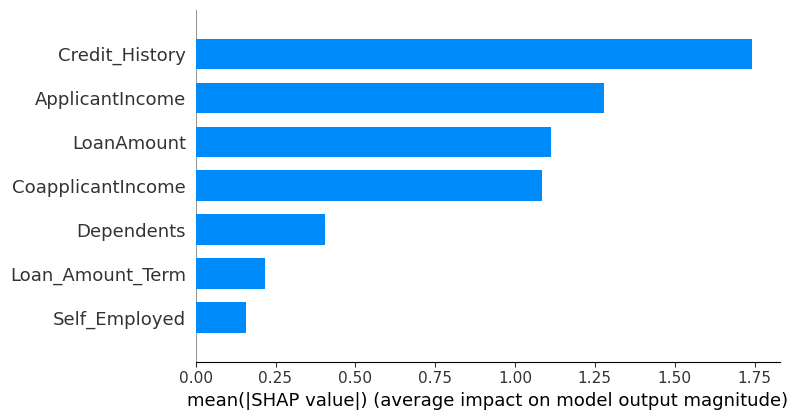

In [ ]:
Which is the best way to visualize the SHAP values?
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=10)